# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
latitude_longitude_list = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

# Create a set of random lat and lng combinations
latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
latitude_longitude_list = zip(latitude, longitude)

# Identify nearest city for each lat, lng combination
for coordinates in latitude_longitude_list:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'{url}appid={weather_api_key}&q={city}&units=metric')
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitude = city_weather['coord']['lat']
        city_longitude = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_latitude, 
                          "Longitude": city_longitude, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print('-'*29)
print("Data Retrieval Complete")
print('-'*29)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kailua-kona
Processing Record 3 of Set 1 | gao
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | perry
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | dartmouth
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | hadibu
Processing Record 12 of Set 1 | gonabad
Processing Record 13 of Set 1 | kuraymah
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | nacala
Processing Record 17 of Set 1 | uturoa
Processing Record 18 of Set 1 | dinhata
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | muynoq
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | 

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Latitude      570
Longitude     570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.09,96,100,20.62,TF,1683587099
1,kailua-kona,19.6406,-155.9956,28.98,76,40,5.14,US,1683586586
2,gao,16.6362,1.6370,32.42,9,65,4.05,ML,1683586558
3,ushuaia,-54.8000,-68.3000,8.81,57,75,5.14,AR,1683586503
4,perry,37.2506,-83.1999,25.10,91,100,2.21,US,1683587100


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.09,96,100,20.62,TF,1683587099
1,kailua-kona,19.6406,-155.9956,28.98,76,40,5.14,US,1683586586
2,gao,16.6362,1.6370,32.42,9,65,4.05,ML,1683586558
3,ushuaia,-54.8000,-68.3000,8.81,57,75,5.14,AR,1683586503
4,perry,37.2506,-83.1999,25.10,91,100,2.21,US,1683587100


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

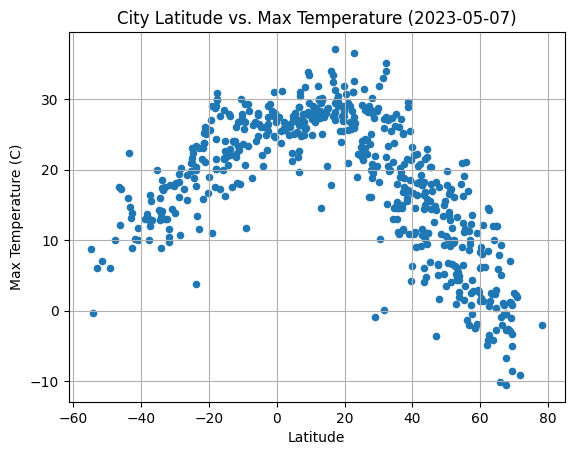

In [38]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Latitude', y='Max Temp', grid=True, title='City Latitude vs. Max Temperature (2023-05-07)')

# Incorporate the other graph properties
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

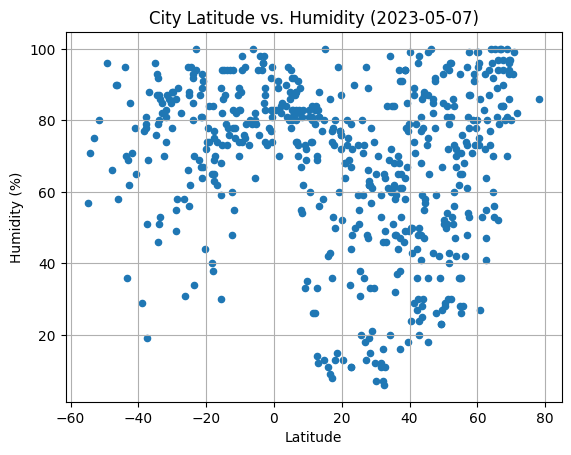

In [39]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Latitude', y='Humidity', grid=True, title='City Latitude vs. Humidity (2023-05-07)')

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

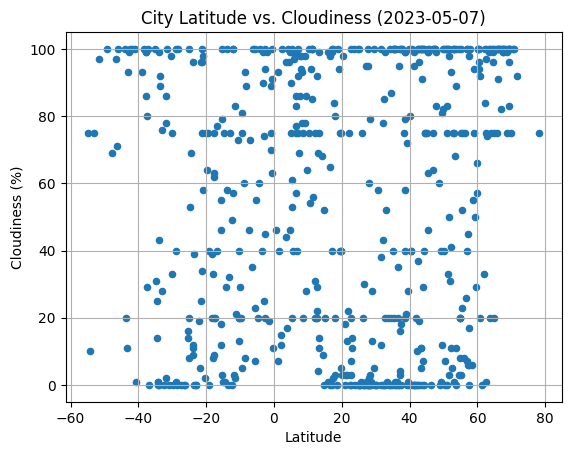

In [40]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Latitude', y='Cloudiness', grid=True, title='City Latitude vs. Cloudiness (2023-05-07)')

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

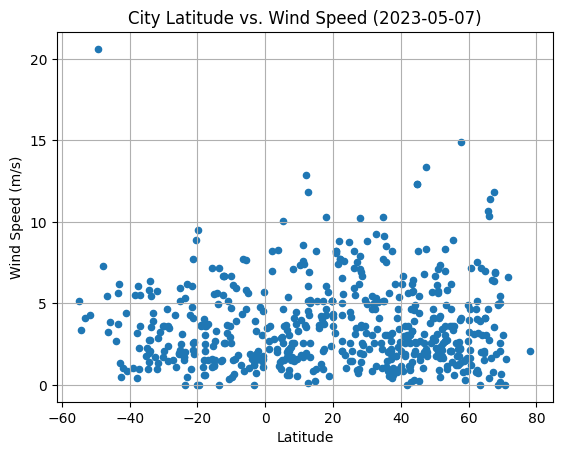

In [41]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Latitude', y='Wind Speed', grid=True, title='City Latitude vs. Wind Speed (2023-05-07)')

# Incorporate the other graph properties
plt.ylabel('Wind Speed (m/s)')

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(),y.min()),fontsize=15,color="red")
    print(f'The r-value is: {rvalue**2}')
    plt.show()


In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kailua-kona,19.6406,-155.9956,28.98,76,40,5.14,US,1683586586
2,gao,16.6362,1.6370,32.42,9,65,4.05,ML,1683586558
4,perry,37.2506,-83.1999,25.10,91,100,2.21,US,1683587100
6,dartmouth,44.6713,-63.5772,11.02,58,75,12.35,CA,1683586909
7,bandarbeyla,9.4942,50.8122,27.68,69,86,0.55,SO,1683587100


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df =city_data_df.loc[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.09,96,100,20.62,TF,1683587099
3,ushuaia,-54.8000,-68.3000,8.81,57,75,5.14,AR,1683586503
5,pisco,-13.7000,-76.2167,22.03,78,0,7.20,PE,1683586520
13,grytviken,-54.2811,-36.5092,-0.34,71,10,3.36,GS,1683587101
14,blackmans bay,-43.0167,147.3167,13.18,69,93,6.17,AU,1683587101


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7060554820183451


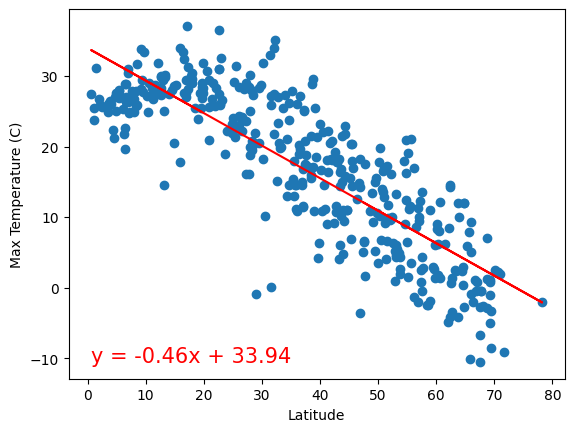

In [45]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
linear_regression(x_values, y_values)


The r-value is: 0.6134859011850056


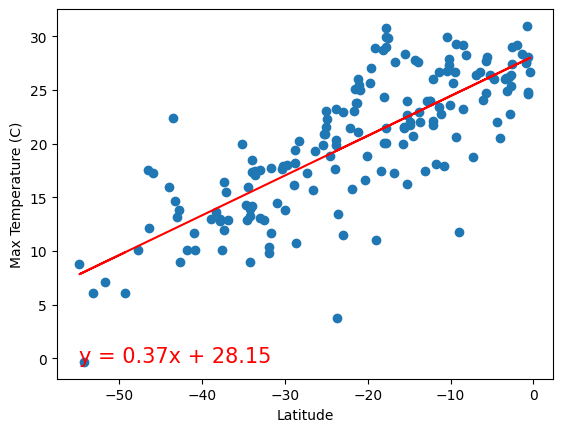

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** Both hemispheres have a positive correlation. The northern hemisphere has a stronger correlation as latitude increases so does the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01052419084505965


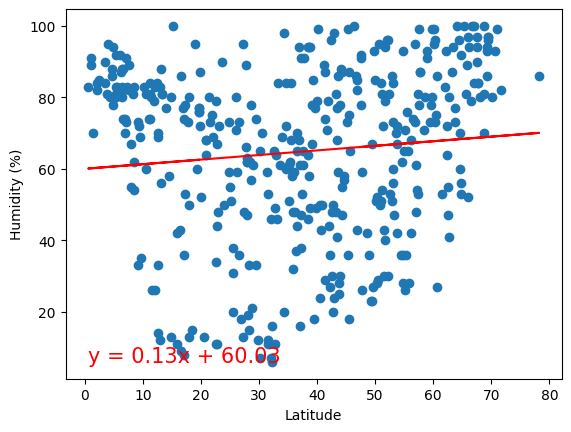

In [47]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
linear_regression(x_values, y_values)

The r-value is: 0.04824220968432614


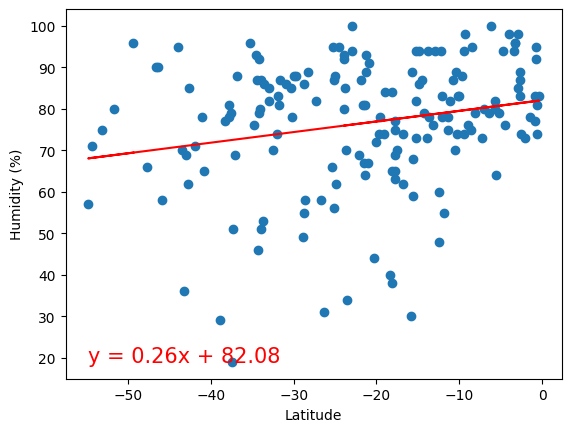

In [48]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** Both hemispheres have a positive correlation. The northern and southern have a very weak correlation between latitude and humidity landing close to 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0254356872405704


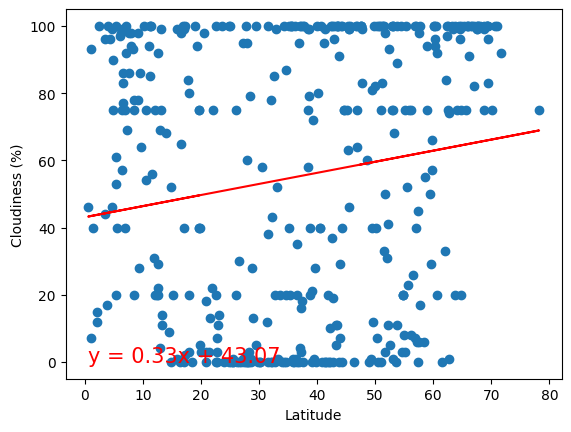

In [49]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
linear_regression(x_values, y_values)

The r-value is: 0.005209598021940732


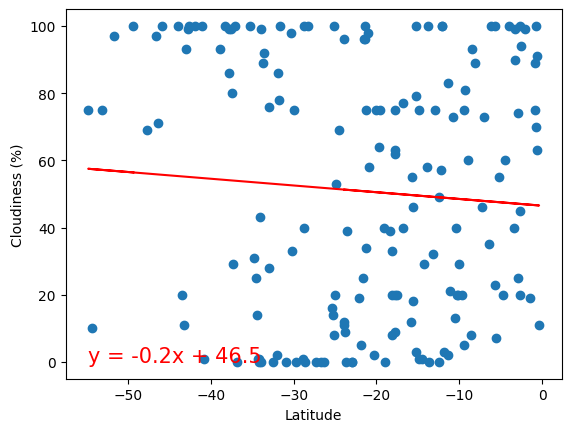

In [50]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** The northern hemisphere has a positive but very weak correlation. The southern hemisphere has a negative and very weak correlation as well.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0021960012925034125


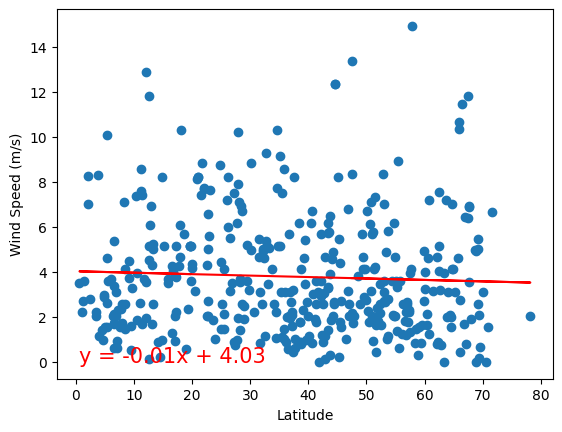

In [51]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
linear_regression(x_values, y_values)

The r-value is: 0.019941234522405916


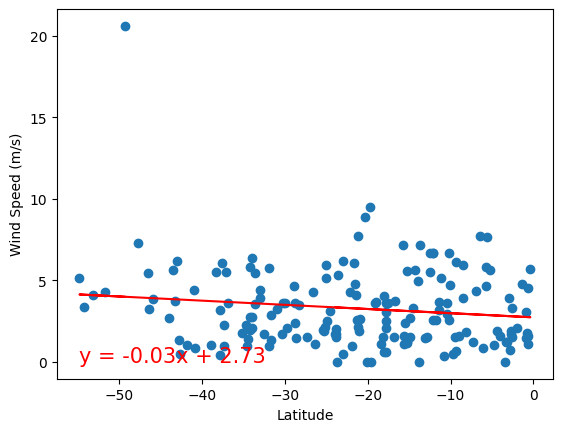

In [52]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
linear_regression(x_values, y_values)

**Discussion about the linear relationship:** Both hemispheres have a negative correlation. Northern and southern have very weak correlation with r values close to 0.